In [1]:
#if run in google colab
%cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/Users/boyangyu/Desktop/Univercity/Rice University/22Spring/COMP590


In [14]:
import pandas as pd
import numpy as np
data=pd.read_csv('./2020_covid_cases.csv')
data=data[data.County=='Dallas']
cases_2020=data.loc[:,'03/06/2020':'12/31/2020'].to_numpy()[0]

In [15]:
data2=pd.read_csv('./2021_covid_cases.csv')
data2=data2[data2.County=='Dallas']
cases_2021=data2.loc[:,'01/01/2021':'12/31/2021'].to_numpy()[0]

data3=pd.read_csv('./2022_covid_cases.csv')
data3=data3[data3.County=='Dallas']
cases_2022=data3.loc[:,'01/01/2022':'03/05/2022'].to_numpy()[0]

all_data=np.concatenate((cases_2020, cases_2021,cases_2022))
all_data.shape

(730,)

In [16]:
data3.loc[:,'01/20/2022'].to_numpy()[0]

3005.0

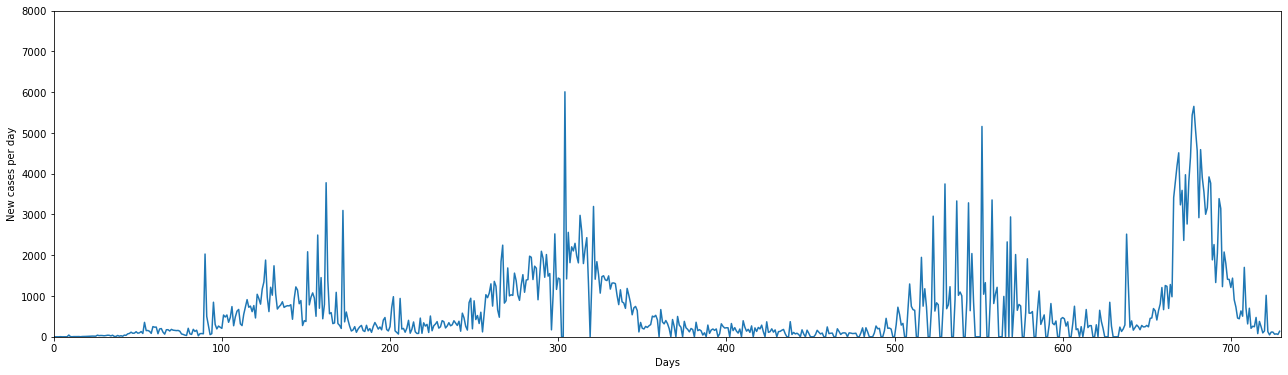

In [17]:
#draw raw daily cases graph
import matplotlib.pyplot as plt
max_day=730
days=np.arange(0,max_day,1)
plt.figure(figsize=(22, 6))
plt.plot(days, all_data)
plt.xlim([0,max_day])
plt.ylim([0,8000])
plt.xlabel("Days")
plt.ylabel("New cases per day")
plt.show()

In [18]:
#draw raw cumulative cases graph
c_data=np.arange(0,max_day,1)
c_data[0]=all_data[0]
for i in range(1,len(all_data)):
  c_data[i]=c_data[i-1]+all_data[i];

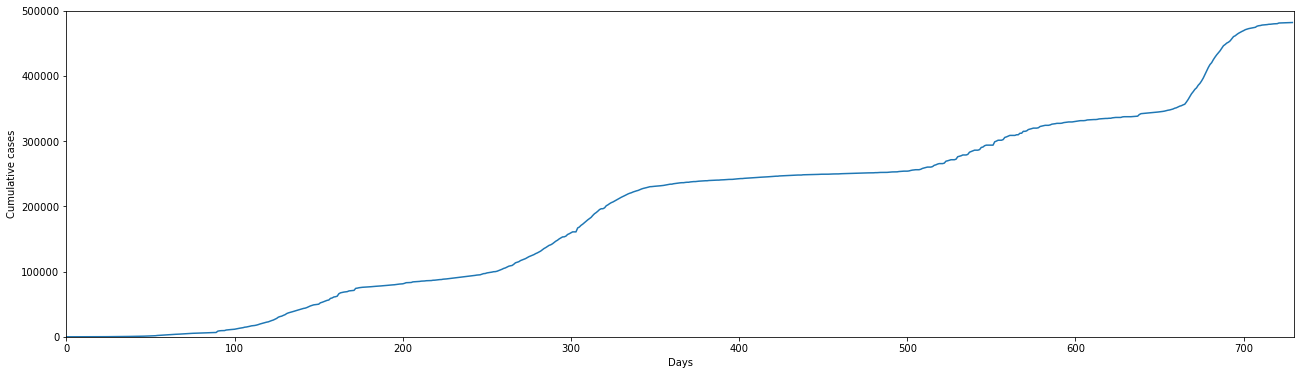

In [19]:
plt.figure(figsize=(22, 6))
plt.plot(days, c_data)
plt.xlim([0,max_day])
plt.ylim([0,5e5])
plt.xlabel("Days")
plt.ylabel("Cumulative cases")
plt.show()

In [20]:
#draw daily data after being preprocessed by a 3-day median filter.
med_data=np.arange(0,max_day,1)
med_data[0]=all_data[0]
med_data[len(all_data)-1]=all_data[len(all_data)-1]
for i in range(1,len(all_data)-1):
  a=all_data[i-1]
  b=all_data[i]
  c=all_data[i+1]
  temp_array=np.array([a,b,c])
  temp_array=np.sort(temp_array)
  med_data[i]=temp_array[1]

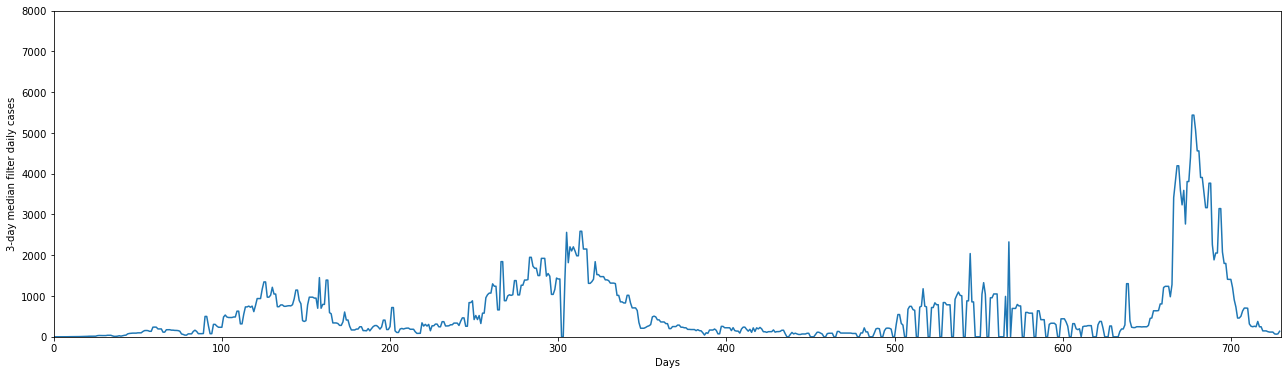

In [21]:
plt.figure(figsize=(22, 6))
plt.plot(days, med_data)
plt.xlim([0,max_day])
plt.ylim([0,8000])
plt.xlabel("Days")
plt.ylabel("3-day median filter daily cases")
plt.show()

In [22]:
#daily data then filtered by a 7-day moving average filter
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

seven_data=moving_average(med_data,7)
seven_data=np.insert(seven_data,0,med_data[2])
seven_data=np.insert(seven_data,0,med_data[1])
seven_data=np.insert(seven_data,0,med_data[0])
seven_data=np.append(seven_data,med_data[len(med_data)-3])
seven_data=np.append(seven_data,med_data[len(med_data)-2])
seven_data=np.append(seven_data,med_data[len(med_data)-1])


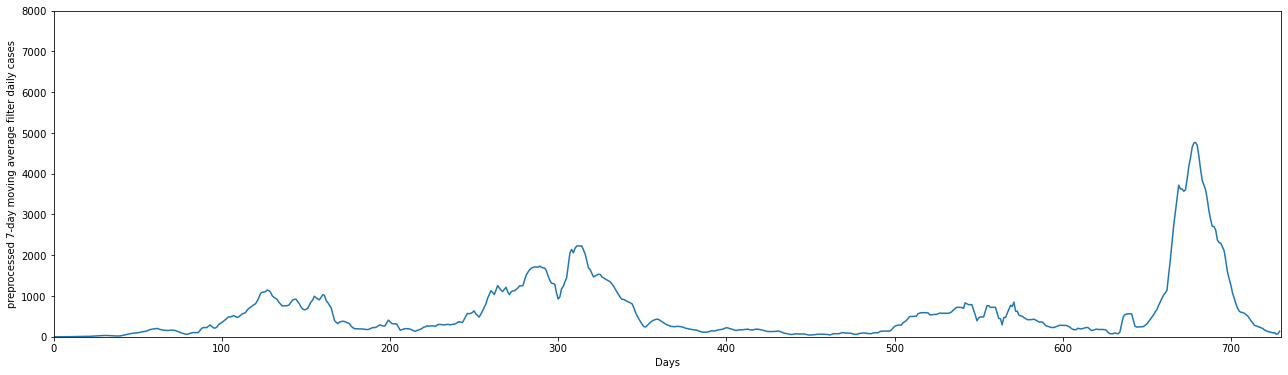

In [23]:
plt.figure(figsize=(22, 6))
plt.plot(days, seven_data)
plt.xlim([0,max_day])
plt.ylim([0,8000])
plt.xlabel("Days")
plt.ylabel("preprocessed 7-day moving average filter daily cases")
plt.show()

In [24]:
c_data2=np.arange(0,max_day,1)
c_data2[0]=seven_data[0]
for i in range(1,len(all_data)):
  c_data2[i]=c_data2[i-1]+seven_data[i];

In [25]:

def gompertz(n, k, t0, t):
    result = n * np.exp(-np.exp(-k * (t - t0)))
    if result > 1:
        return result
    else:
        return 1

# discrete range of days (starting from 0 -> 250, step=1, exclusive?)
days = np.arange(0, max_day, 1)
diff_days = np.arange(0, max_day-1, 1)
ratios = np.diff(np.log(c_data2))
ratios=np.log(ratios)

<ipython-input-25-9fa4db479490>:11: RuntimeWarning: divide by zero encountered in log
  ratios = np.diff(np.log(c_data2))
/Users/boyangyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


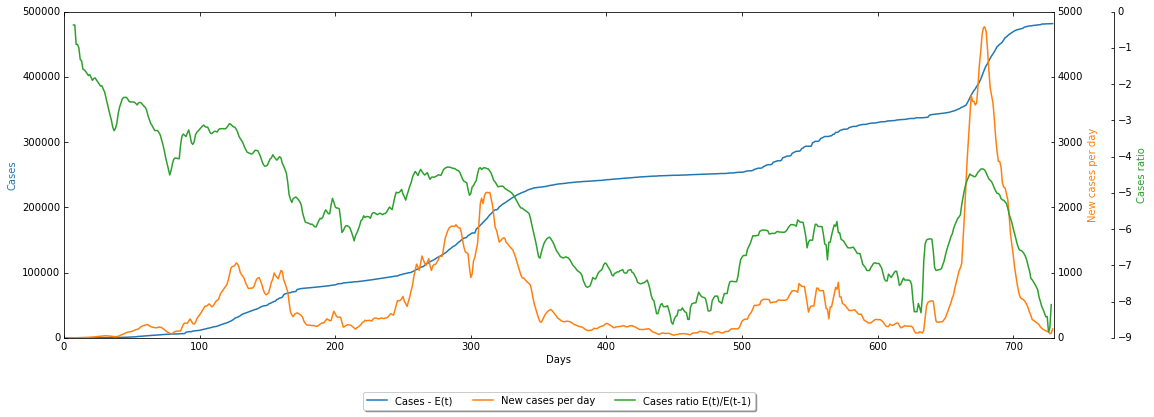

In [26]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 6))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(60, 0))

par1.axis["right"].toggle(all=True)

host.set_xlim(0, max_day)
# host.set_yscale('log')
host.set_ylim(0, 5e5)

host.set_xlabel("Days")
host.set_ylabel("Cases")
par1.set_ylabel("New cases per day")
par1.set_ylim(top=5000, bottom=0)
par2.set_ylabel("Cases ratio")
par2.set_ylim(top=0, bottom=-9)

p1, = host.plot(days, c_data, label="Cases - E(t)")
p2, = par1.plot(days, seven_data, label="New cases per day")
p3, = par2.plot(diff_days, ratios, label="Cases ratio E(t)/E(t-1)")

host.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            fancybox=True, shadow=True, ncol=5)

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())
plt.draw()

plt.show()

In [27]:
all_data

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 4.300e+01, 3.000e+00, 2.000e+00,
       5.000e+00, 4.000e+00, 5.000e+00, 6.000e+00, 2.000e+00, 7.000e+00,
       7.000e+00, 9.000e+00, 1.100e+01, 1.400e+01, 1.400e+01, 1.700e+01,
       1.500e+01, 1.500e+01, 4.000e+01, 2.800e+01, 3.200e+01, 3.000e+01,
       2.500e+01, 3.000e+01, 3.800e+01, 3.700e+01, 2.100e+01, 3.900e+01,
       1.100e+01, 8.000e+00, 3.300e+01, 1.600e+01, 2.600e+01, 1.400e+01,
       4.100e+01, 3.600e+01, 7.200e+01, 8.200e+01, 1.130e+02, 8.700e+01,
       9.000e+01, 1.240e+02, 8.900e+01, 9.700e+01, 1.290e+02, 8.200e+01,
       3.540e+02, 1.520e+02, 1.550e+02, 1.350e+02, 8.400e+01, 2.500e+02,
       2.360e+02, 2.380e+02, 7.600e+01, 1.930e+02, 2.020e+02, 1.140e+02,
       6.500e+01, 1.730e+02, 1.740e+02, 1.420e+02, 1.820e+02, 1.630e+02,
       1.570e+02, 1.520e+02, 1.560e+02, 1.370e+02, 7.000e+01, 5.800e+01,
       4.100e+01, 3.200e+01, 2.090e+02, 7.200e+01, 

In [28]:
import pandas as pd

In [29]:
data={'Daily case':all_data}

In [30]:
df=pd.DataFrame(data,columns=['Daily case'])

In [31]:
df.to_csv (r'./export_dataframe.csv', index = False, header=True)